# NeuroML Parser

The aim of this script is to understand the neuroML format and extract useful information that will be used in the celegans3000 simulator. 

The NeuroML file comes from the [c302 project](https://github.com/openworm/CElegansNeuroML/tree/master/CElegans/pythonScripts/c302).

In [5]:
# Dependencies
%matplotlib inline
import neuroml
import neuroml.loaders as loaders
import matplotlib.pyplot as plt

import matplotlib as mpl
import csv
import networkx as nx

In [6]:
file = ('../data/c302_B_Full.nml')
nml = loaders.NeuroMLLoader.load(file)

#Example
print(nml.networks[0])
print(nml.networks[0].populations[0].id)
print(nml.networks[0].populations[0].component)
print(nml.networks[0].projections[0])
print(nml.networks[0].projections[0].synapse)
print(nml.networks[0].projections[0].presynaptic_population)
print(nml.networks[0].projections[0].postsynaptic_population)

Network c302_B_Full with 397 population(s)
ADAL
generic_neuron_iaf_cell
Projection: NC_ADAL_AIBL_Glutamate from ADAL to AIBL, synapse: neuron_to_neuron_exc_syn
neuron_to_neuron_exc_syn
ADAL
AIBL


In [16]:
array = {}
nodes = []
edges = []

for n in nml.networks[0].populations:
    nodes.append(n.id)
    array[n.id] = {}

for i in nml.networks[0].projections:
    info = [i.presynaptic_population, i.postsynaptic_population, i.synapse]
    array[i.presynaptic_population][i.postsynaptic_population] = i.synapse
    edges.append([i.presynaptic_population, i.postsynaptic_population])

    
#array[0:10]

ValueError: could not convert string to float: VD13

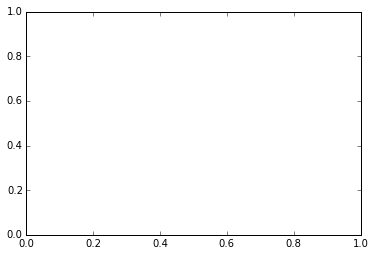

In [19]:
plt.plot(edges)

/Users/Kato/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/Kato/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


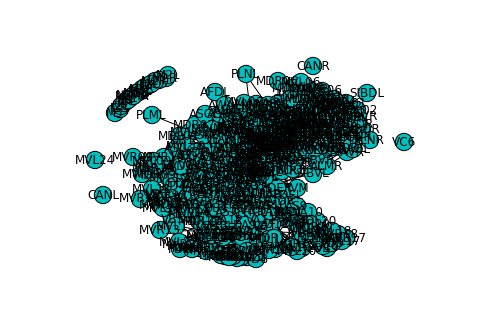

In [82]:
G=nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, node_color='c',edge_color='k', with_labels=True)

In [83]:
File = open("network.csv",'wb')
wr = csv.writer(File)
wr.writerows(array)